# **Data Mining Project** 
# Task 2: Clustering Analysis by K-means
Pistolesi Veronica, Poli Francesca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Libraries

In [ ]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from collections import defaultdict
from scipy.stats import pearsonr
from scipy.stats import entropy
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score 
from kneed import KneeLocator
from math import pi

### Loading users_profile

In [ ]:
users_profile = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_clustering.csv', lineterminator='\n')

In [ ]:
users_profile

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
0,45825,187157.0,1201.0,868.0,793.0,2643.0,21325.0,34.0,723.522858,1.419478,79.342039,1.812974,11.120054,109.637321,3900,0.608718
1,11770,1158520.0,969.0,766.0,345.0,1357.0,296689.0,19.0,11508.209770,1.078419,573.720435,1.221178,0.000000,85.026719,3893,0.519137
2,39158,92396.0,391.0,77.0,318.0,2113.0,13121.0,8.0,546.629170,0.490437,43.277519,1.169776,6.843951,80.780317,3885,0.551866
3,18035,317861.0,209.0,488.0,848.0,1475.0,105138.0,7.0,3359.356296,0.392886,157.694596,1.393654,0.000000,84.281111,3884,0.519310
4,22496,138486.0,1714.0,185.0,234.0,2662.0,16181.0,32.0,462.741573,1.166943,40.803260,0.896682,10.333883,95.166473,3870,0.887855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,19061,7.0,85.0,372.0,1006.0,821.0,1.0,3.0,0.043355,0.154787,0.024751,0.591606,11.548946,46.490945,896,4.148438
11504,96,8860.0,161.0,21.0,1.0,77.0,6181.0,18.0,611.718156,2.666807,82.761468,0.908257,0.000000,84.586538,894,0.121924
11505,107,2458.0,9.0,22.0,47.0,34.0,976.0,1.0,103.166369,0.256601,19.425197,0.811024,3.958058,82.080645,894,0.142058
11506,6,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.000000,0.372678,0.166667,0.500000,0.000000,26.666667,893,0.006719


In [ ]:
users_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_count      11508 non-null  int64  
 1   retweet_count       11508 non-null  float64
 2   favorite_count      11508 non-null  float64
 3   num_hashtags        11508 non-null  float64
 4   num_urls            11508 non-null  float64
 5   num_mentions        11508 non-null  float64
 6   max_retweet_count   11508 non-null  float64
 7   max_favorite_count  11508 non-null  float64
 8   std_retweet_count   11508 non-null  float64
 9   std_favorite_count  11508 non-null  float64
 10  popularity          11508 non-null  float64
 11  tweet_richness      11508 non-null  float64
 12  text_entropy        11508 non-null  float64
 13  avg_textlen         11508 non-null  float64
 14  days_on_tw          11508 non-null  int64  
 15  activity_richness   11508 non-null  float64
dtypes: f

### Check for correlations

In [ ]:
users_profile.corr()

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
statuses_count,1.000000,0.165005,0.012030,0.307346,0.324522,0.562791,0.260234,0.058355,0.157174,-0.019404,0.046735,0.130808,0.390239,0.008527,0.306761,0.441564
retweet_count,0.165005,1.000000,0.067799,0.153684,0.043044,0.316225,0.524070,0.048682,0.667045,0.028207,0.448862,0.071211,0.194193,-0.019312,0.019498,0.287950
favorite_count,0.012030,0.067799,1.000000,0.055285,0.038395,0.049466,0.019821,0.288178,0.049974,0.466686,0.123324,0.059043,0.015674,0.088749,0.055650,0.030397
num_hashtags,0.307346,0.153684,0.055285,1.000000,0.330799,0.495764,0.258190,0.067219,0.161224,0.001766,0.051397,0.306916,0.335132,0.255868,0.268445,0.382203
num_urls,0.324522,0.043044,0.038395,0.330799,1.000000,0.281933,0.118013,0.095041,0.038344,-0.004031,-0.004221,0.185009,0.289516,0.263621,0.314916,0.521873
num_mentions,0.562791,0.316225,0.049466,0.495764,0.281933,1.000000,0.466660,0.073451,0.304692,-0.016033,0.112579,0.284764,0.525943,0.065373,0.283215,0.663045
max_retweet_count,0.260234,0.524070,0.019821,0.258190,0.118013,0.466660,1.000000,0.079551,0.768317,0.047868,0.323226,0.143023,0.297703,-0.016815,0.175121,0.413420
max_favorite_count,0.058355,0.048682,0.288178,0.067219,0.095041,0.073451,0.079551,1.000000,0.229281,0.646514,0.309205,0.049502,0.063574,0.168527,0.099156,0.112104
std_retweet_count,0.157174,0.667045,0.049974,0.161224,0.038344,0.304692,0.768317,0.229281,1.000000,0.375111,0.761421,0.119150,0.184251,0.091734,0.108707,0.261621
std_favorite_count,-0.019404,0.028207,0.466686,0.001766,-0.004031,-0.016033,0.047868,0.646514,0.375111,1.000000,0.667487,0.052472,-0.032822,0.230110,0.076952,-0.037039


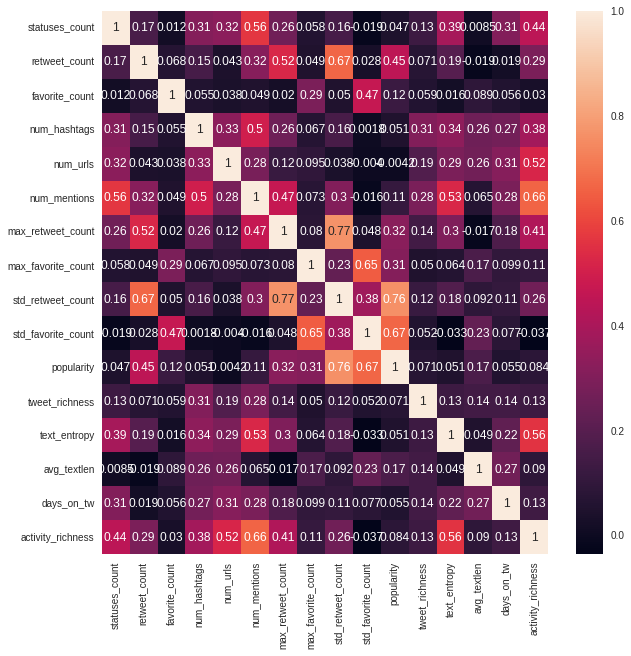

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(users_profile.corr(), annot=True)
plt.show()

These indicators’ correlations are below the set threshold value (0.8), indicating a weak association.

## Clustering Preprocessing - Normalization  
A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max.
In our project, we performed z-score normalization of the dataset, which standardizes features such that the mean of all of the values is 0 and the standard deviation is 1.

In [ ]:
scaler = StandardScaler()
scaler.fit(users_profile.values)

StandardScaler()

In [ ]:
users_profile.head().values

array([[4.58250000e+04, 1.87157000e+05, 1.20100000e+03, 8.68000000e+02,
        7.93000000e+02, 2.64300000e+03, 2.13250000e+04, 3.40000000e+01,
        7.23522858e+02, 1.41947839e+00, 7.93420388e+01, 1.81297388e+00,
        1.11200542e+01, 1.09637321e+02, 3.90000000e+03, 6.08717949e-01],
       [1.17700000e+04, 1.15852000e+06, 9.69000000e+02, 7.66000000e+02,
        3.45000000e+02, 1.35700000e+03, 2.96689000e+05, 1.90000000e+01,
        1.15082098e+04, 1.07841900e+00, 5.73720435e+02, 1.22117763e+00,
        0.00000000e+00, 8.50267194e+01, 3.89300000e+03, 5.19136912e-01],
       [3.91580000e+04, 9.23960000e+04, 3.91000000e+02, 7.70000000e+01,
        3.18000000e+02, 2.11300000e+03, 1.31210000e+04, 8.00000000e+00,
        5.46629170e+02, 4.90437268e-01, 4.32775187e+01, 1.16977612e+00,
        6.84395059e+00, 8.07803172e+01, 3.88500000e+03, 5.51866152e-01],
       [1.80350000e+04, 3.17861000e+05, 2.09000000e+02, 4.88000000e+02,
        8.48000000e+02, 1.47500000e+03, 1.05138000e+05, 7.000

In [ ]:
X = scaler.transform(users_profile.values)

In [ ]:
X[:5]

array([[ 2.35154422, -0.10599965, -0.0037701 ,  1.38849296,  1.34145739,
         2.11021572, -0.15883668, -0.14889354, -0.18145245, -0.11860932,
        -0.12099222,  1.00483459,  2.12158848,  2.37021204,  3.76411345,
         0.14152155],
       [ 0.36234992,  0.22016231, -0.01532425,  1.18303827,  0.35681892,
         0.8403493 ,  2.65084441, -0.1610402 ,  1.80143057, -0.12135574,
         0.11473806,  0.48922026, -0.72093363,  0.8873474 ,  3.75144203,
         0.01345811],
       [ 1.96211658, -0.13781828, -0.04411004, -0.20478799,  0.29747687,
         1.58686486, -0.24254633, -0.16994775, -0.2139763 , -0.12609052,
        -0.13818856,  0.44443566,  1.02852554,  0.63148856,  3.7369604 ,
         0.06024724],
       [ 0.72829625, -0.06211217, -0.05317408,  0.62307354,  1.46233934,
         0.95686893,  0.69635064, -0.17075753,  0.30317444, -0.12687606,
        -0.08363203,  0.6394937 , -0.72093363,  0.84242216,  3.73515019,
         0.01370554],
       [ 0.98886873, -0.12234228,  0

# Methods to estimate the best K

In [ ]:
model = KMeans()
k_range = [10, 20]

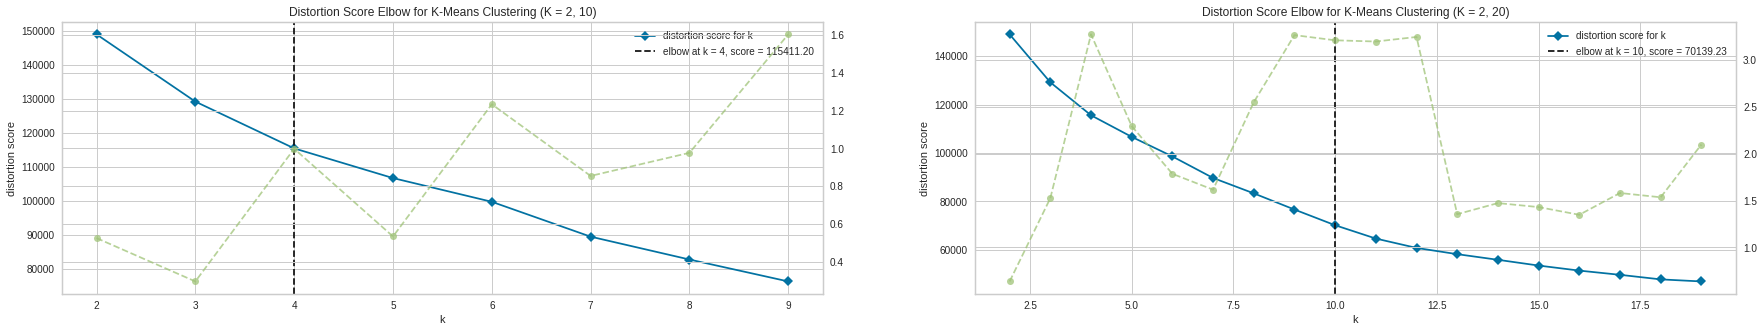

In [ ]:
# Elbow plots
f, axs = plt.subplots(nrows=1, ncols=len(k_range), figsize=(30,5))

for i in range(len(k_range)):
    vis = KElbowVisualizer(model, k=(2,k_range[i]), ax=axs[i])   
    vis.fit(X)  
    axs[i].set_title('Distortion Score Elbow for K-Means Clustering (K = ' + str(2) + ', ' + str(k_range[i]) + ')' )
    axs[i].set_ylabel('distortion score')
    axs[i].set_xlabel('k')
    axs[i].legend(['distortion score for k','elbow at k = ' + str(vis.elbow_value_) + ', score = ' + '{:.2f}'.format(vis.elbow_score_)])
plt.show()

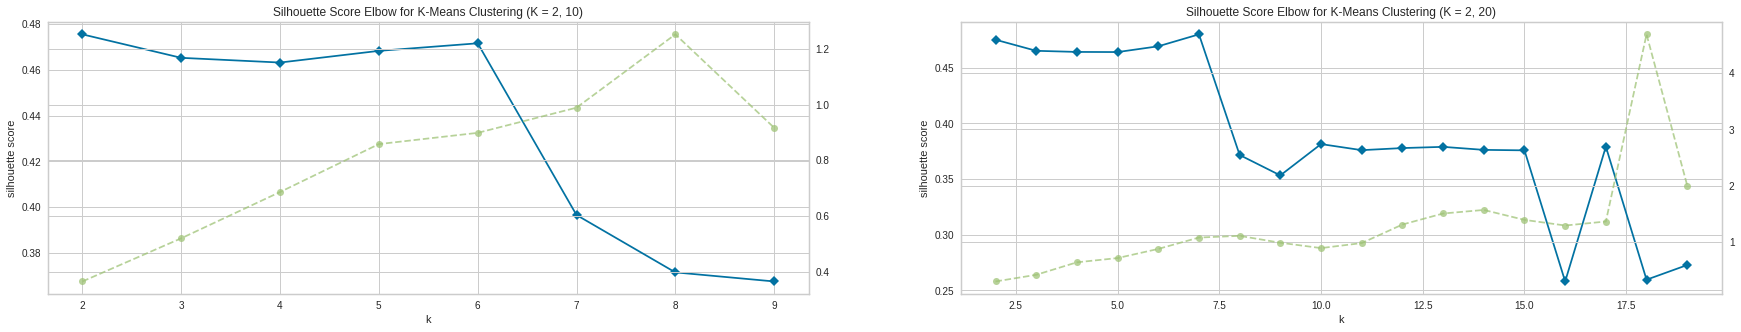

In [ ]:
# Silhouette plots
f, axs = plt.subplots(nrows=1, ncols=len(k_range), figsize=(30,5))

for i in range(len(k_range)):
    vis = KElbowVisualizer(model, k=(2,k_range[i]), ax=axs[i], metric='silhouette', locate_elbow=False)   
    vis.fit(X)  
    axs[i].set_title('Silhouette Score Elbow for K-Means Clustering (K = ' + str(2) + ', ' + str(k_range[i]) + ')' )
    axs[i].set_ylabel('silhouette score')
    axs[i].set_xlabel('k')
plt.show()

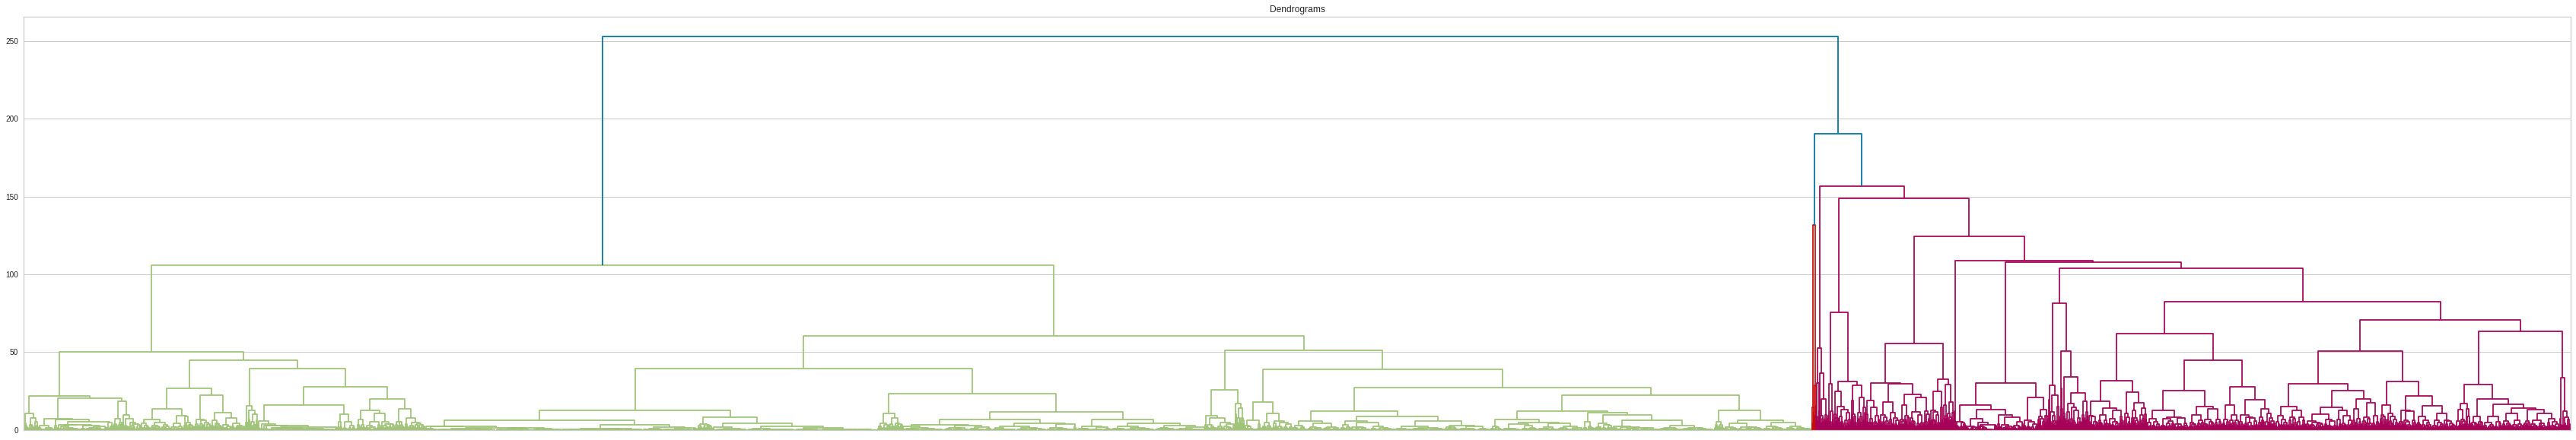

In [ ]:
# Dendogram from Hierarchical Clustering    (extra method to select potential number of clusters)
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(60, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'), no_labels=True)

In [ ]:
potK = [3, 4, 6, 10]  # potential number of clusters

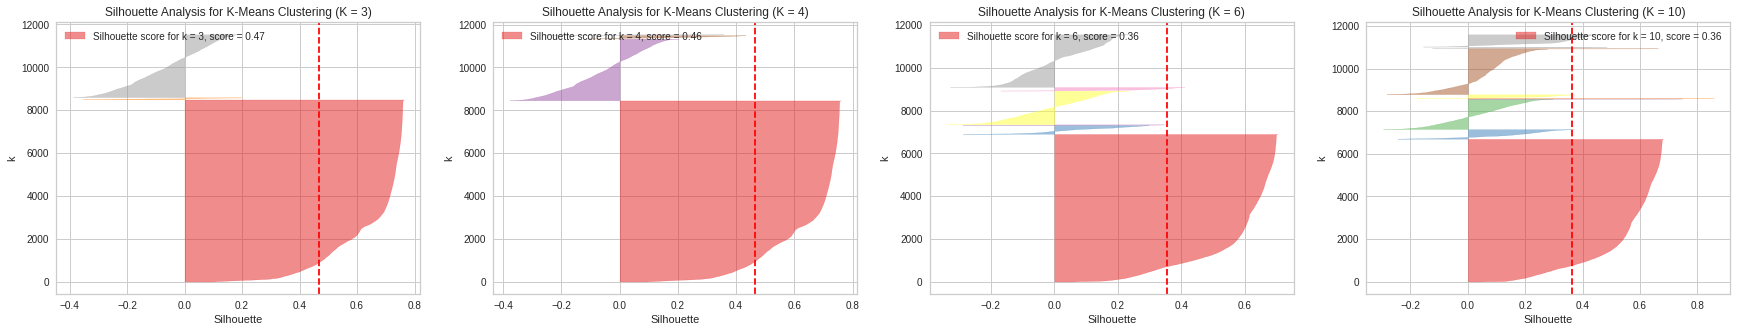

In [ ]:
# Silhouette Visualizer
f, axs = plt.subplots(nrows=1, ncols=len(potK), figsize=(30,5))

for i in range(len(potK)):
    sil_vis = SilhouetteVisualizer(KMeans(potK[i]), ax=axs[i])
    sil_vis.fit(X)    
    axs[i].set_title('Silhouette Analysis for K-Means Clustering (K = ' + str(potK[i]) + ')' )
    axs[i].set_ylabel('k')
    axs[i].set_xlabel('Silhouette')
    axs[i].legend(['Silhouette score for k = ' + str(potK[i]) + ', score = ' + '{:.2f}'.format(sil_vis.silhouette_score_)])
plt.show()

In [ ]:
centers = []
labels = []
inertia = []
for k in potK:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100) 
    kmeans.fit(X) 
    centers.append(scaler.inverse_transform(kmeans.cluster_centers_)) 
    labels.append(kmeans.labels_) 
    inertia.append(kmeans.inertia_) # sse

sse=[]
dav=[]
sil=[]
cal=[]
# scores for each selected K
for i in range(len(potK)):
    sse.append(inertia[i])
    dav.append(davies_bouldin_score(X, labels[i]))
    sil.append(silhouette_score(X, labels[i]))
    cal.append(calinski_harabasz_score(X, labels[i]))
    print("K=", potK[i], " SSE=", sse[i], " Silhouette=", sil[i], " Davies_Bouldin=", dav[i], " Calinski_Harabasz=", cal[i])
    

K= 3  SSE= 129199.9181472302  Silhouette= 0.4652066285730557  Davies_Bouldin= 1.450744094969334  Calinski_Harabasz= 2445.6191256869724
K= 4  SSE= 115580.16049540271  Silhouette= 0.46341764623199944  Davies_Bouldin= 1.4095834977805237  Calinski_Harabasz= 2274.249439468023
K= 6  SSE= 98617.68481689977  Silhouette= 0.35466182500582727  Davies_Bouldin= 1.3079840515648946  Calinski_Harabasz= 1994.6528410677975
K= 10  SSE= 71166.87204145742  Silhouette= 0.37305301118167156  Davies_Bouldin= 1.2125012316005888  Calinski_Harabasz= 2027.8271679720485


The K-Means is a clustering algorithm which groups data based on cluster center point
(centroid) closest to data. The purpose of K-Means is grouping data maximizing data similarity in
one cluster and minimizing data similarity between clusters. 
In this context, Sum of Square Error (SSE) measures the distance between data and their cluster centers (centroids). So, the lower the SSE, the more cohesion is in the clusters. At the same time, a lower value of SSE is expected as k increases. [--> K=10]

The silhouette score falls within the range -1 +1. A silhouette score of 1 means that the clusters are very dense and nicely separated. A score of 0 means that clusters are overlapping. A score less than 0 means that data belonging to clusters may be wrong / incorrect. [--> K=3]

The Davies-Bouldin score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score. The minimum score is zero, with lower values indicating better clustering. [--> K=10]

The Calinski-Harabasz (CH) Index (also known as Variance ratio criterion) is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Here cohesion is estimated based on the distances from the data points in a cluster to its cluster centroid and separation is based on the distance of the cluster centroids from the global centroid. Higher value of CH index means the clusters are dense and well separated. [--> K=3]

In [ ]:
K = 3  # final choice

# K-Means

## The Algorithm in a Nutshell

**Objective:** Clusters the data into $k$ groups.
* **Init step:** Select k points at random as cluster centers.
* **Assignment step:** Assign each instance to the cluster with the closest mean according to the distance function.
* **Update step**: Calculate the new means to be the centroids of the instances in the new clusters.
* ***Repeat*** steps 2 and 3 until the assignment no longer change.

There is no guarantee that the optimum is found using this algorithm.

## K-Means Problems

* Initial Centroids
* Number of clusters

## K-Means in Python  ([sklearn](http://scikit-learn.org/stable/modules/clustering.html#k-means))

Parameters:
* **n_clusters** (default 8): The number of clusters
* **n_init** (default 10): Number of time k-means will be run with different initial centroids. The final results will be the best output in terms of inertia.
* **max_iter** (default 300): Maximum number of iterations of the k-means algorithm for a single run.

Output:
* **labels_**: Labels of each point
* **cluster\_centers_**: Coordinates of cluster centers
* **inertia_**: Sum of squared distances of samples to their closest cluster center.

In [ ]:
kmeans = KMeans(n_clusters=K, n_init=10, max_iter=100)
kmeans.fit(X)

KMeans(max_iter=100, n_clusters=3)

Labels

In [ ]:
kmeans.labels_[:5]

array([0, 0, 0, 0, 0], dtype=int32)

Observing the size of each cluster

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([2925, 8482,  101]))

In [ ]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 2925, 1: 8482, 2: 101}

### Centers

In [ ]:
kmeans.cluster_centers_

array([[ 0.8510394 ,  0.21682703,  0.02251513,  0.76838036,  0.9949051 ,
         1.1555685 ,  0.80286277,  0.19065205,  0.42932526, -0.04238777,
         0.06927979,  0.46354176,  1.01605246,  0.1657646 ,  0.70463478,
         1.26809727],
       [-0.29986277, -0.15545495, -0.04652439, -0.27394375, -0.34516685,
        -0.41376082, -0.31529595, -0.1061909 , -0.23418732, -0.05222112,
        -0.11145142, -0.16717346, -0.35793728, -0.07698689, -0.24875795,
        -0.44903219],
       [ 0.50191169,  6.76468297,  3.25302989,  0.72229088,  0.13453104,
         1.23537997,  3.19417943,  3.38775664,  7.21395996,  5.61281455,
         7.34797391,  0.59617324,  0.59354999,  1.65755503,  0.45592127,
         0.93420934]])

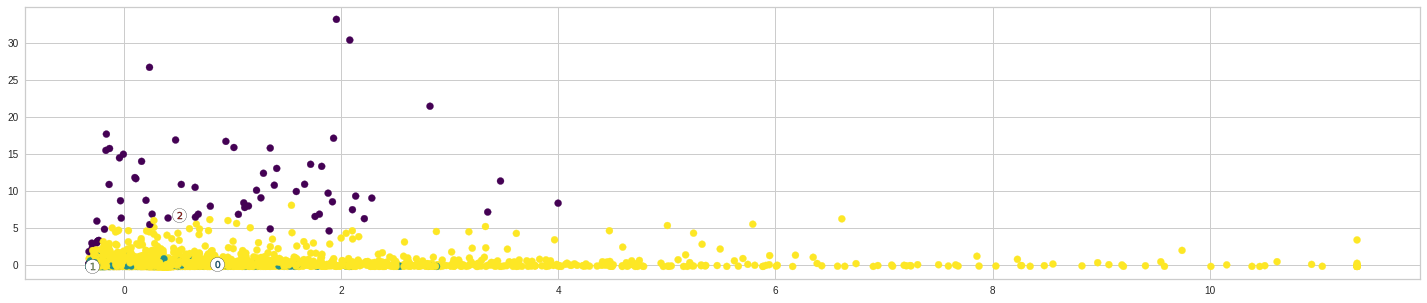

In [ ]:
plt.figure(figsize=(25,5))
plt.scatter(X[:,0],X[:,1],cmap="viridis_r", c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
for i, c in enumerate(kmeans.cluster_centers_):
  plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
plt.show()

In [ ]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
# scatter plots with centroids
f, axs = plt.subplots(nrows=16, ncols=16, figsize=(50,50))
plt.suptitle(("Visualization of the clusters with respect to different users_profile features"), fontsize=28, fontweight='bold')
plot_id = 0
for i in range(len(users_profile.columns)):
    for j in range(len(users_profile.columns)):
        a, b = users_profile.columns[i], users_profile.columns[j]
        axs[int(plot_id/16)][plot_id%16].scatter(users_profile[a], users_profile[b], cmap="viridis_r", c=kmeans.labels_, s=10)
        for h in range(len(centers)):
            axs[int(plot_id/16)][plot_id%16].scatter(centers[h][users_profile.columns.get_loc(a)], centers[h][users_profile.columns.get_loc(b)], marker='o', c="white", alpha=1, s=200, edgecolor='k')
            axs[int(plot_id/16)][plot_id%16].scatter(centers[h][users_profile.columns.get_loc(a)], centers[h][users_profile.columns.get_loc(b)], marker='$%d$' % h, alpha=1, s=50, edgecolor='k')  
        axs[int(plot_id/16)][plot_id%16].set_xlabel(a, fontdict={'fontsize': 'x-large', 'fontweight' : 'bold'})
        axs[int(plot_id/16)][plot_id%16].set_ylabel(b, fontdict={'fontsize': 'x-large', 'fontweight' : 'bold'})
        plot_id = plot_id +1
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Visualization of clusters centers by means of parallel coordinates

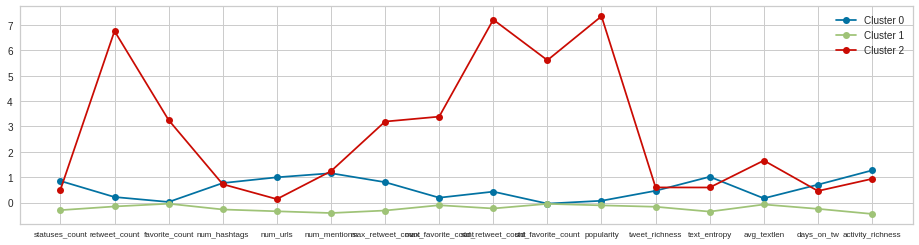

In [ ]:
plt.figure(figsize=(16, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(users_profile.columns)), users_profile.columns, fontsize=8)
plt.legend(fontsize=10)
plt.show()

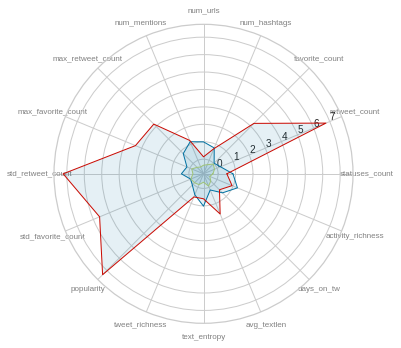

In [ ]:
# number of variable
N = len(users_profile.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(kmeans.cluster_centers_)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = kmeans.cluster_centers_[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], users_profile.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)


### Clustering Evaluation

In [ ]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation (Davies Bouldin) %s' % metrics.davies_bouldin_score(X, kmeans.labels_))
print('Calinski Harabasz %s' % metrics.calinski_harabasz_score(X, kmeans.labels_))

SSE 129196.50683099593
Silhouette 0.4651353112359615
Separation (Davies Bouldin) 1.4483505517636832
Calinski Harabasz 2445.8372083260742


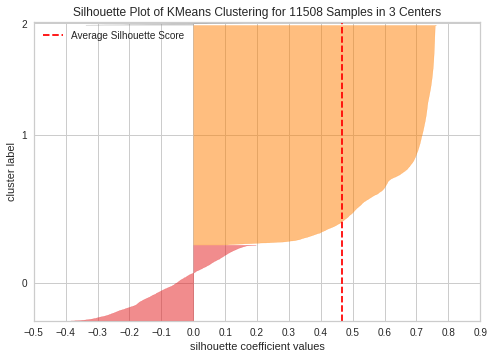

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 11508 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
sil_visualizer = SilhouetteVisualizer(kmeans)
sil_visualizer.fit(X)    
sil_visualizer.show()

## Clusters characterization with respect to categorical features

In [ ]:
users_profile_all = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_noout.csv', lineterminator='\n')

In [ ]:
users_profile_all.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,6237.625,138813.625,0.0,1031.125,297.5,...,0.0,8.831943,6.080426,0.0,9.183814,9.578214,10.607494,109.637321,3900,0.608718
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,6237.625,138813.625,0.0,969.000,297.5,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,85.026719,3893,0.519137
2,755116,呉⚛,en,0,2012-02-08 05:25:49,6237.625,92396.000,0.0,391.000,77.0,...,0.0,3.921117,2.375534,0.0,4.836434,5.114369,6.387527,80.780317,3885,0.551866
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,6237.625,138813.625,0.0,209.000,297.5,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,84.281111,3884,0.519310
4,785080,W H,en,0,2012-02-23 01:08:16,6237.625,138486.000,0.0,1031.125,185.0,...,0.0,8.277790,2.354578,0.0,8.421512,8.222893,9.556485,95.166473,3870,0.887855


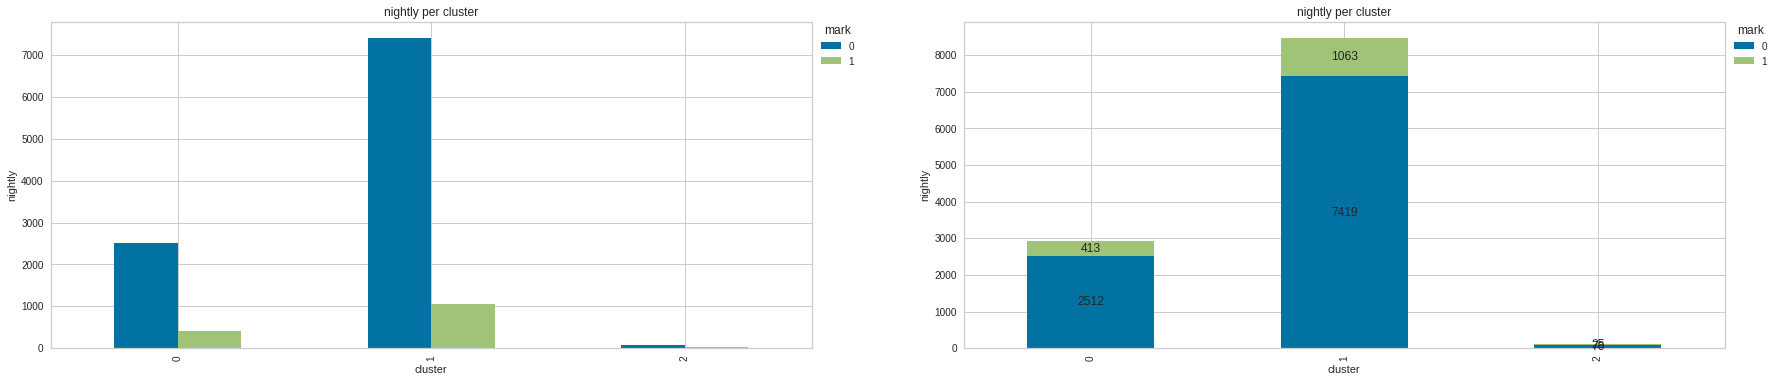

In [ ]:
nightly_ct = pd.crosstab(kmeans.labels_,users_profile_all['nightly'])

f, axs = plt.subplots(ncols=2, figsize=(30,6))

ax1 = nightly_ct.plot(kind='bar', stacked=False, title='nightly per cluster', ax=axs[0])
ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
axs[0].set_xlabel('cluster')
axs[0].set_ylabel('nightly')

ax2 = nightly_ct.plot(kind='bar', stacked=True, title='nightly per cluster', ax=axs[1])
ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
# add counts
for c in ax2.containers:
    # set the bar label
    ax2.bar_label(c, label_type='center')
axs[1].set_xlabel('cluster')
axs[1].set_ylabel('nightly')

plt.show()

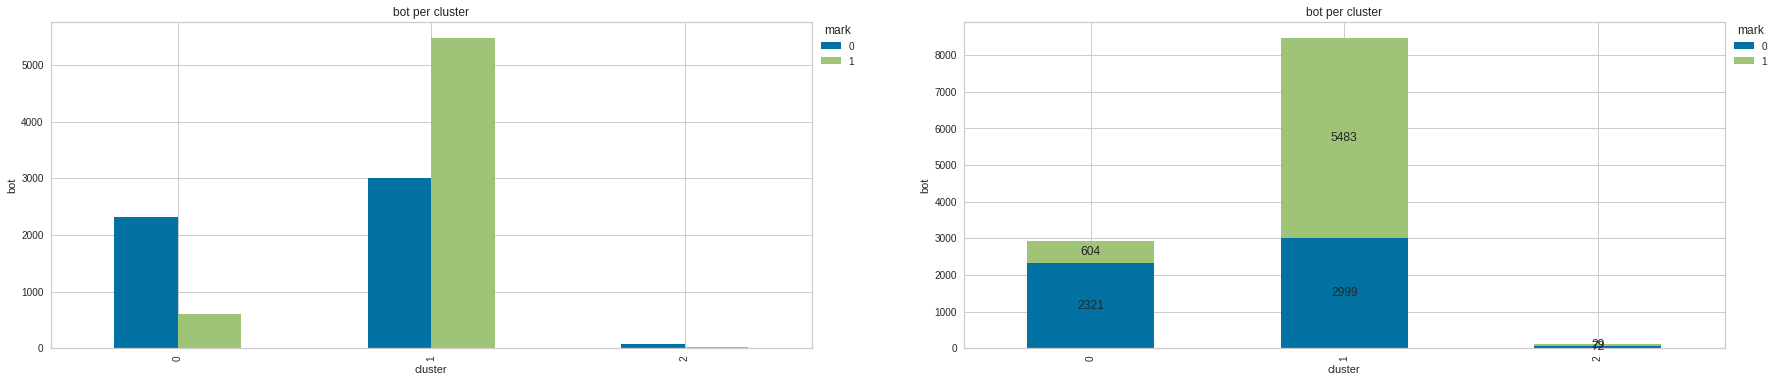

In [ ]:
bot_ct = pd.crosstab(kmeans.labels_,users_profile_all['bot'])

f, axs = plt.subplots(ncols=2, figsize=(30,6))

ax1 = bot_ct.plot(kind='bar', stacked=False, title='bot per cluster', ax=axs[0])
ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
axs[0].set_xlabel('cluster')
axs[0].set_ylabel('bot')

ax2 = bot_ct.plot(kind='bar', stacked=True, title='bot per cluster', ax=axs[1])
ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
# add counts
for c in ax2.containers:
    # set the bar label
    ax2.bar_label(c, label_type='center')
axs[1].set_xlabel('cluster')
axs[1].set_ylabel('bot')

plt.show()

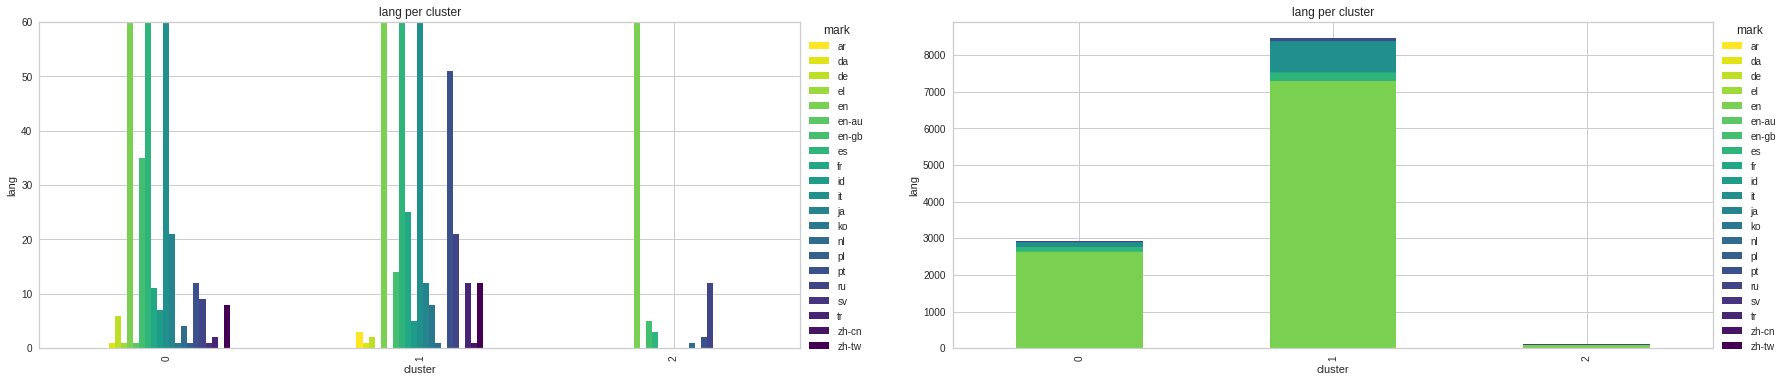

In [ ]:
lang_ct = pd.crosstab(kmeans.labels_,users_profile_all['lang'])

f, axs = plt.subplots(ncols=2, figsize=(30,6))

ax1 = lang_ct.plot(kind='bar', stacked=False, title='lang per cluster', ax=axs[0], colormap="viridis_r")
ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
axs[0].set_xlabel('cluster')
axs[0].set_ylabel('lang')
axs[0].set_ylim(0, 60) 

ax2 = lang_ct.plot(kind='bar', stacked=True, title='lang per cluster', ax=axs[1], colormap="viridis_r")
ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
axs[1].set_xlabel('cluster')
axs[1].set_ylabel('lang')

plt.show()

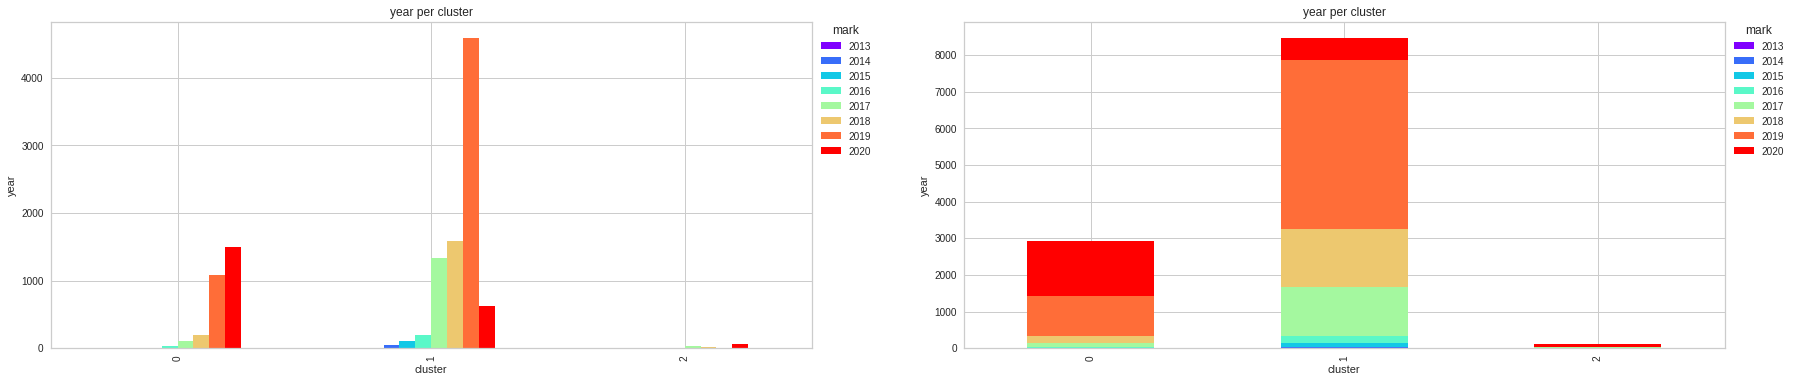

In [ ]:
year_ct = pd.crosstab(kmeans.labels_,users_profile_all['most_freq_year'])

f, axs = plt.subplots(ncols=2, figsize=(30,6))

ax1 = year_ct.plot(kind='bar', stacked=False, title='year per cluster', ax=axs[0], colormap="rainbow")
ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
axs[0].set_xlabel('cluster')
axs[0].set_ylabel('year')

ax2 = year_ct.plot(kind='bar', stacked=True, title='year per cluster', ax=axs[1], colormap="rainbow")
ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
axs[1].set_xlabel('cluster')
axs[1].set_ylabel('year')

plt.show()

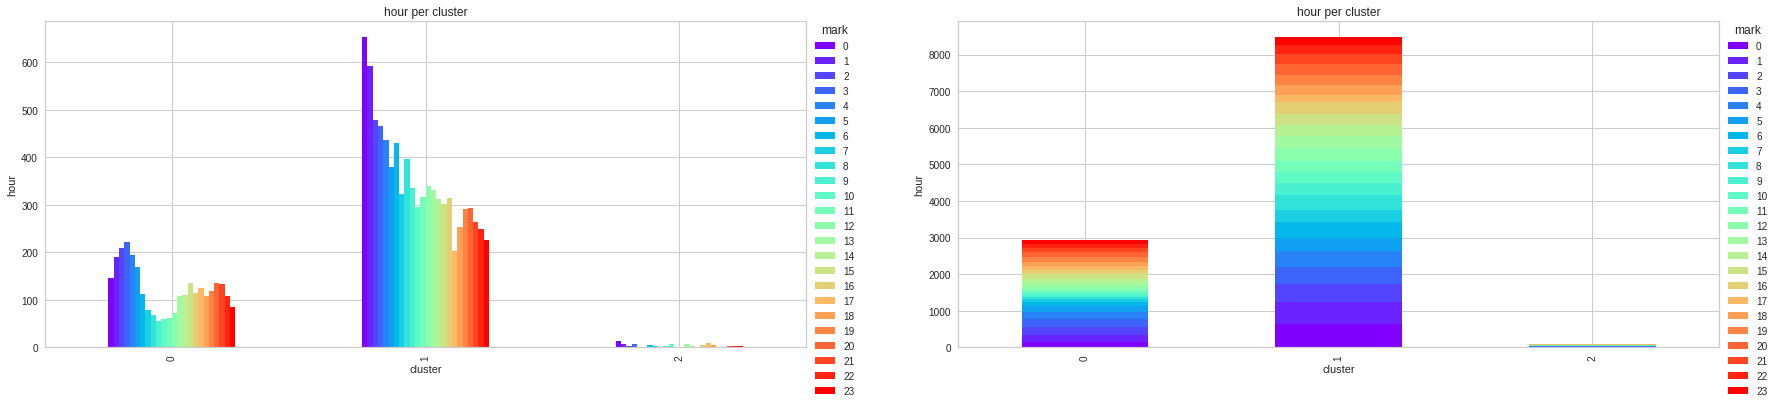

In [ ]:
hour_ct = pd.crosstab(kmeans.labels_,users_profile_all['most_freq_hour'])

f, axs = plt.subplots(ncols=2, figsize=(30,6))

ax1 = hour_ct.plot(kind='bar', stacked=False, title='hour per cluster', ax=axs[0], colormap="rainbow")
ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
axs[0].set_xlabel('cluster')
axs[0].set_ylabel('hour')

ax2 = hour_ct.plot(kind='bar', stacked=True, title='hour per cluster', ax=axs[1], colormap="rainbow")
ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
axs[1].set_xlabel('cluster')
axs[1].set_ylabel('hour')

plt.show()